In [29]:
import pathlib
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [30]:
DEVICE = torch.device("cpu")
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
elif torch.backends.mps.is_built() and torch.backends.mps.is_available():
    DEVICE = torch.device("mps")

In [31]:
def load_models():
    plate_model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
    plate_model.load_state_dict(torch.load("plate_model.pth"))
    plate_model.to(DEVICE)
    plate_model.eval()
    return [plate_model]

def process_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(image).to(DEVICE)

def plot_image(image_path, bbox):
    image = Image.open(image_path).convert("RGB")
    fig, ax = plt.subplots()
    ax.imshow(image)
    rectangle = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth = 2, edgecolor="tab:red")
    ax.add_patch(rectangle)
    ax.set_axis_off()
    plt.show()  
    
def best_box(plate):
    best_idx = plate['scores'].argmax()  
    best_box = plate['boxes'][best_idx]
    return best_box.tolist()

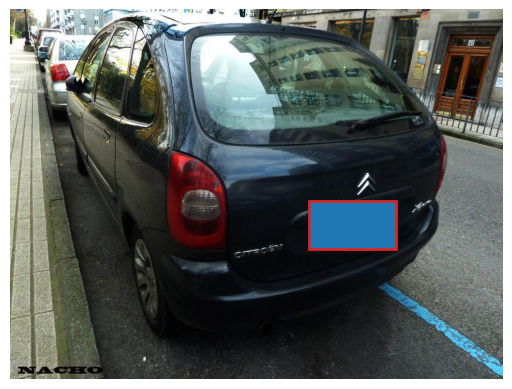

In [33]:

image_path = "main_test_image.jpg"
models = load_models()
plate_model = models[0]
image = process_image(image_path)

with torch.no_grad():
    plate_output = plate_model([image])[0]
bbox = best_box(plate_output)
plot_image(image_path, bbox)